In [16]:
import sys
sys.path.insert(0,'src/')#change this to your path
from facilityAnalysis import *
from linearRegression import * 
from facility_ABM import *
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [17]:
"""
LOAD AND CLEAN POPULATION INFORMATION
"""
#create population county data frame
COUNTY_SHP_FILE = 'data/UScounties/'
COUNTY_POP_FILE = '/Users/willthompson/Documents/CSDS/DS1/FacilityScaling//data/historical_county_populations.csv'
EPSG=4326

#create a dataframe with population information for each county
df_merged = make_county_pop_df(COUNTY_SHP_FILE,COUNTY_POP_FILE,EPSG)
#get the boundary of the US
boundary_shape = make_boundary(df_merged,EPSG)


In [18]:
df_pop = pd.read_csv("data/simulated_pop_points.csv")
gdf_pop = gpd.GeoDataFrame(df_pop,geometry = gpd.points_from_xy(df_pop.lon,df_pop.lat)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement
df_state = df_merged.dissolve("state").reset_index().loc[:,['state','geometry']]

In [19]:
lat_col = 'latitude'#CHANGE TO THE NAME OF THE LAT COL IN YOUR DF
lon_col = "longitude"#CHANGE TO THE NAME OF THE LON COL IN YOUR DF
clinic_df = pd.read_csv('data/abortion_data.csv')
clinic_geo_df = create_facility_geo_df(clinic_df,boundary_shape,lat_col=lat_col,lon_col=lon_col).set_crs(4326)
clinic_geo_df = clinic_geo_df.reset_index()

creating facility points from lat lon pairs...
initializing GeoDataFrame...
filtering locations within boundaries


In [20]:
#pop_with_facilty_info = gpd.sjoin(abortion_nearest_facility.set_geometry("nearest_fac"),clinic_geo_df.set_crs(4326)).set_geometry('geometry')

In [21]:
objective_function/1070

TypeError: unsupported operand type(s) for /: 'function' and 'int'

In [ ]:
pop_row = gdf_pop.iloc[0]

nearest_fac = nearest(pop_row,df2=clinic_geo_df)


pop_row.geometry.distance(nearest_fac)

1.2735363980015333

<AxesSubplot:>

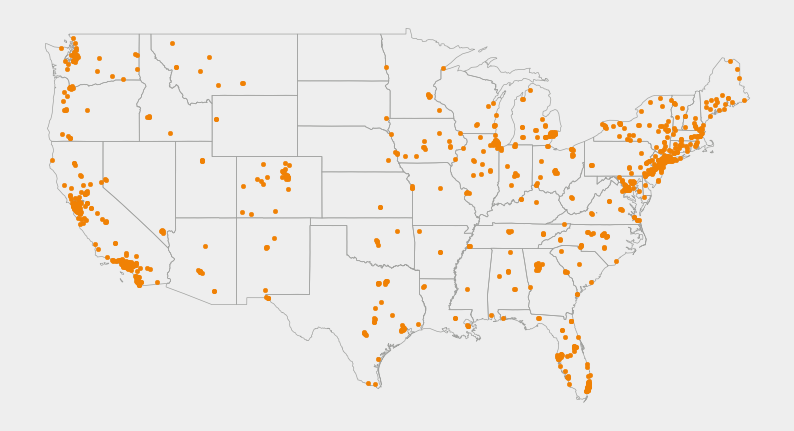

In [ ]:
BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 11)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat')

<AxesSubplot:>

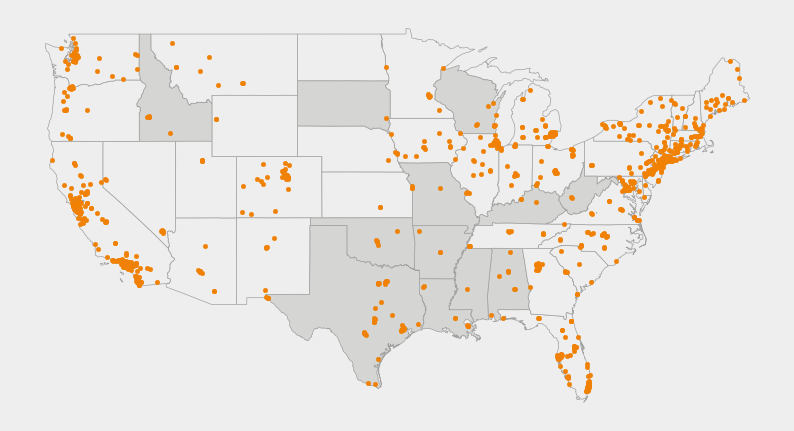

In [ ]:

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

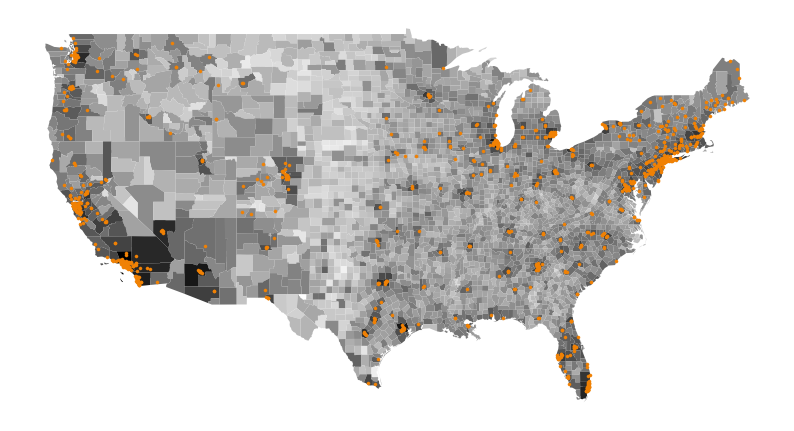

In [ ]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])


#BACKGROUND_COLOR = '#EEEEEE'
BACKGROUND_COLOR = '#FFFFFF'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged.plot(column = 'log_pop',ax = ax)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])
plt.savefig("plots/abortion_facility_locs_with_pop.svg")

## 100 Time Steps

<AxesSubplot:>

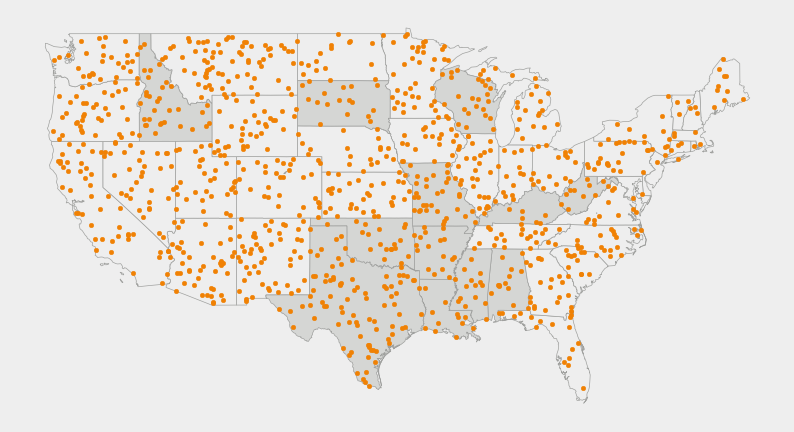

In [ ]:
sim10df = gpd.read_parquet('ind_move_results/all_100steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim10df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

calculating voronoi tesselllation
filtering locations by boundary...
calculating voronoi tesselation
calculating voronoi_cell county overlap...
estimating cell population
joining vornoi tesslation to boundary data
print calculating facility and population densities


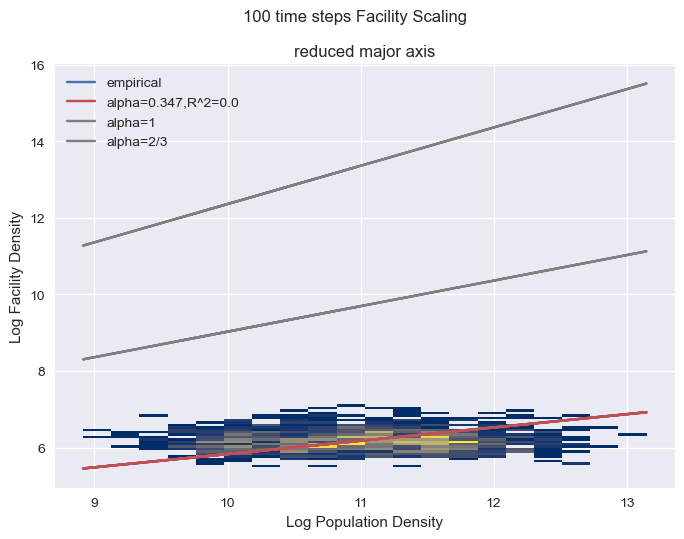

In [ ]:
sim10df = sim10df.reset_index().rename(columns = {'index':'fac_id'})



# best_ind_df = param_df.sort_values(by = 'max_fitness').iloc[-1]['best_ind']
# best_ind_geo_df = create_facility_geo_df(best_ind_df,boundary_shape,lat_col='lat',lon_col='lon').set_crs(4326)
# best_ind_geo_df.reset_index(inplace=True)


#best_ind_geo_df['facility_id'] = best_ind_geo_df['index']
#gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,best_ind_geo_df)
#gdf_pop_nearest_fac =gdf_pop_nearest_fac.to_crs(4326)
#gdf_pop_nearest_fac2 = gpd.GeoDataFrame(gdf_pop_nearest_fac,geometry = gpd.points_from_xy(gdf_pop_nearest_fac.lon_pop,gdf_pop_nearest_fac.lat_pop)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement



MERCATOR_EPSG = 3395 
AREA_EPSG = 6933
voronoi_epsg = MERCATOR_EPSG
area_epsg = AREA_EPSG

population_col = "pop_2010"
cell_index_col= 'fac_id'
fac_density_col = 'fac_density'
pop_density_col = 'pop_density'

"""
Lets calculate the population density and facility density using the voronoi cell method
"""
voronoi_pop_fac_density = calc_voronoi_pop_density_and_fac_density(fac_pos_df_to_voronoi=sim10df,
                                              border_df=df_merged,
                                              cell_index_col =cell_index_col,
                                              population_col=population_col,
                                              voronoi_epsg=MERCATOR_EPSG,                                              
                                              area_epsg=6693)

"""
Perform a least squares regression on the data
"""
ls_reg = LeastSquares()#instantaite a regression object
rma_reg = ReducedMajorAxis()#instantaite a regression object
pop_density_arr = np.log10(voronoi_pop_fac_density['pop_density'].values)
fac_density_arr = np.log10(voronoi_pop_fac_density['fac_density'].values)


#fit the regression to data
ls_reg.fit(pop_density_arr,fac_density_arr)
rma_reg.fit(pop_density_arr,fac_density_arr)

#make the plot
fig,ax = plt.subplots()
make_scaling_plot(rma_reg,ax,"reduced major axis")

plt.suptitle("100 time steps Facility Scaling")
plt.legend()
#plt.savefig("../plots/best_facility_scaling.png",dpi=300)

### 1000 time steps

<AxesSubplot:>

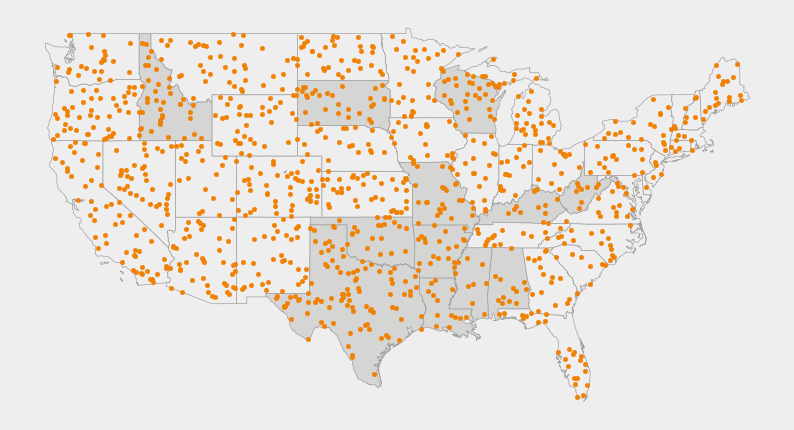

In [ ]:
sim1000df = gpd.read_parquet('/Users/willthompson/Documents/CSDS/MOCS/MOCSFacilityPlacement/output/all_1000steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim1000df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

### HPC RESULTS

<AxesSubplot:>

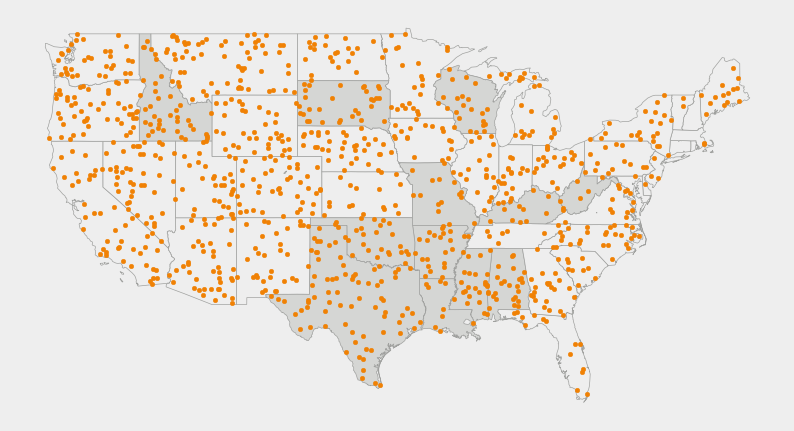

In [ ]:
sim10000df_all = gpd.read_parquet('./output/HPC_data/output/all_10000steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim10000df_all.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

<AxesSubplot:>

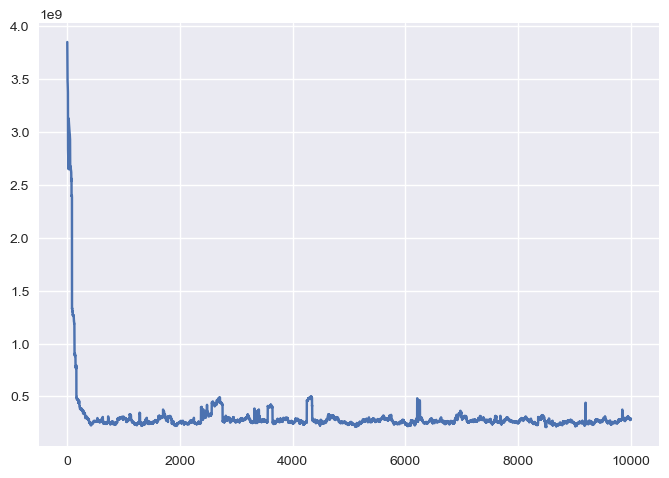

In [ ]:
sim10000df_all_fitness = pd.read_csv('./output/HPC_data/output/legal_10000steps_placement.csv')
sim10000df_all_fitness.total_objective_function.plot()


<AxesSubplot:>

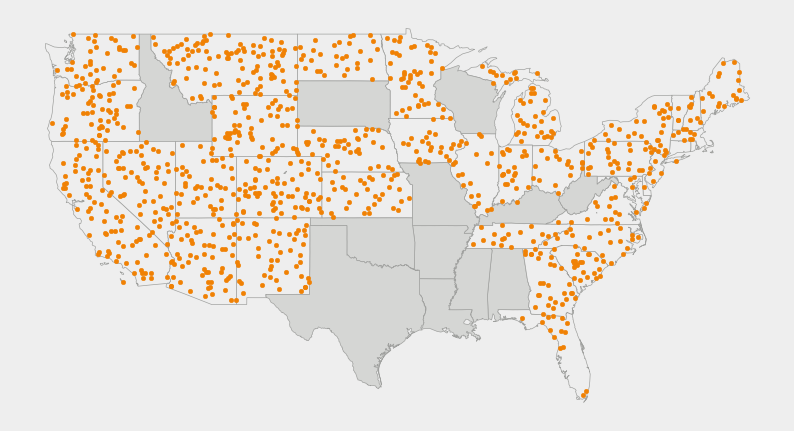

In [ ]:
sim10000df_legal = gpd.read_parquet('./output/HPC_data/output/legal_10000steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim10000df_legal.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

<AxesSubplot:>

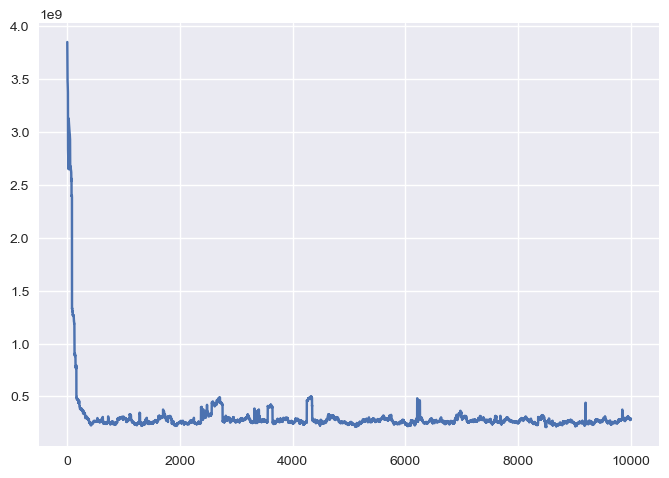

In [ ]:
sim10000df_legal_fitness = pd.read_csv('./output/HPC_data/output/legal_10000steps_placement.csv')
sim10000df_legal_fitness.total_objective_function.plot()

In [22]:
sim1000df = sim1000df.reset_index().rename(columns = {'index':'fac_id'})



# best_ind_df = param_df.sort_values(by = 'max_fitness').iloc[-1]['best_ind']
# best_ind_geo_df = create_facility_geo_df(best_ind_df,boundary_shape,lat_col='lat',lon_col='lon').set_crs(4326)
# best_ind_geo_df.reset_index(inplace=True)


#best_ind_geo_df['facility_id'] = best_ind_geo_df['index']
#gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,best_ind_geo_df)
#gdf_pop_nearest_fac =gdf_pop_nearest_fac.to_crs(4326)
#gdf_pop_nearest_fac2 = gpd.GeoDataFrame(gdf_pop_nearest_fac,geometry = gpd.points_from_xy(gdf_pop_nearest_fac.lon_pop,gdf_pop_nearest_fac.lat_pop)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement



MERCATOR_EPSG = 3395 
AREA_EPSG = 6933
voronoi_epsg = MERCATOR_EPSG
area_epsg = AREA_EPSG

population_col = "pop_2010"
cell_index_col= 'fac_id'
fac_density_col = 'fac_density'
pop_density_col = 'pop_density'

"""
Lets calculate the population density and facility density using the voronoi cell method
"""
voronoi_pop_fac_density = calc_voronoi_pop_density_and_fac_density(fac_pos_df_to_voronoi=sim1000df,
                                              border_df=df_merged,
                                              cell_index_col =cell_index_col,
                                              population_col=population_col,
                                              voronoi_epsg=MERCATOR_EPSG,                                              
                                              area_epsg=6693)

"""
Perform a least squares regression on the data
"""
ls_reg = LeastSquares()#instantaite a regression object
rma_reg = ReducedMajorAxis()#instantaite a regression object
pop_density_arr = np.log10(voronoi_pop_fac_density['pop_density'].values)
fac_density_arr = np.log10(voronoi_pop_fac_density['fac_density'].values)


#fit the regression to data
ls_reg.fit(pop_density_arr,fac_density_arr)
rma_reg.fit(pop_density_arr,fac_density_arr)

#make the plot
fig,ax = plt.subplots()
make_scaling_plot(rma_reg,ax,"reduced major axis")

plt.suptitle("1000 time steps Facility Scaling")
plt.legend()
#plt.savefig("../plots/best_facility_scaling.png",dpi=300)

NameError: name 'sim1000df' is not defined

In [29]:
# sim10df['lon'] = sim10df['geometry'].x
# sim10df['lat'] = sim10df['geometry'].y
# sim10df2 = sim10df.reset_index()
# sim10df_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim10df2)



# sim1000df['lon'] = sim1000df['geometry'].x
# sim1000df['lat'] = sim1000df['geometry'].y
# sim1000df2 = sim1000df.reset_index()
# sim1000df_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim1000df2)

sim10000df_all['lon'] = sim10000df_all['geometry'].x
sim10000df_all['lat'] = sim10000df_all['geometry'].y
sim10000df_all2 = sim10000df_all.reset_index()
sim10000df_all_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim10000df_all2)

sim10000df_legal['lon'] = sim10000df_legal['geometry'].x
sim10000df_legal['lat'] = sim10000df_legal['geometry'].y
sim10000df_legal2 = sim10000df_legal.reset_index()
sim10000df_legal_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim10000df_legal2)


clinic_gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,clinic_geo_df)

changed
changed
changed


In [26]:
# clinic_pop_nearest_fac = calc_facility_distance(gdf_pop,clinic_geo_df)

# #100 steps
# sim10df['lon'] = sim10df['geometry'].x
# sim10df['lat'] = sim10df['geometry'].y
# sim10df.reset_index(inplace=True)
# sim10df_nearest_fac = gdf_pop_nearest_fac = calc_facility_distance(gdf_pop,sim10df)



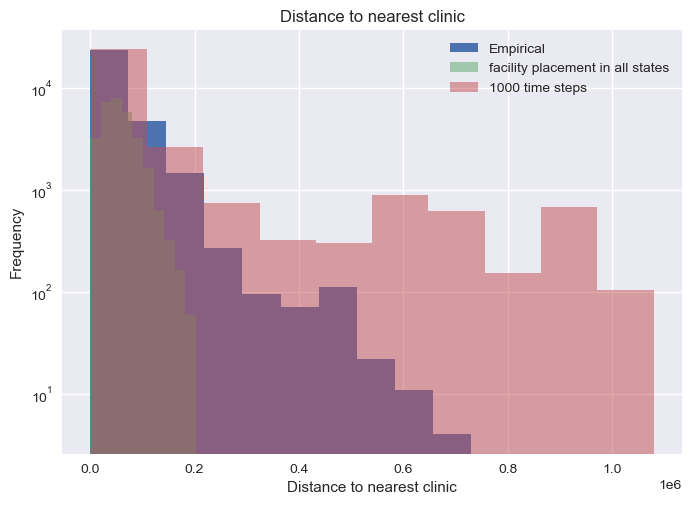

In [30]:
fig,ax = plt.subplots()
clinic_gdf_pop_nearest_fac.distance.plot.hist(ax =ax,label = 'Empirical')
#sim10df_nearest_fac.distance.plot.hist(ax = ax,label = '100 time steps',alpha = 0.5)
sim10000df_all_gdf_pop_nearest_fac.distance.plot.hist(ax = ax,label = 'facility placement in all states', alpha = 0.5)
sim10000df_legal_gdf_pop_nearest_fac.distance.plot.hist(ax = ax,label = '1000 time steps', alpha = 0.5)


ax.legend()

ax.set(title = "Distance to nearest clinic", yscale='log',xlabel='Distance to nearest clinic')
plt.savefig("plots/distance_to_nearest_facility")


In [ ]:
clinic_pop_nearest_fac.distance

0        147333.935903
1        179662.129161
2         89513.016363
3        151557.320389
4         67467.796989
             ...      
29978    100262.936748
29979     89844.420891
29980     87997.238701
29981     91897.078988
29982     89879.041396
Name: distance, Length: 29983, dtype: float64